# Домашнее задание 2.
Dynamical Forecasting Methods

In [1]:
import os
import sys
import scipy
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
warnings.simplefilter('ignore')

plt.rcParams['figure.figsize'] = 16, 8
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 8

In [3]:
def HankelMatrix(X, L):
    N = X.shape[0]
    return scipy.linalg.hankel(X[ : N - L + 1], X[N - L : N])

# Пример

Показания акселерометра мобильного устройства с частотой записи 500Гц

In [4]:
DATA_PATH = "https://raw.githubusercontent.com/intsystems/MathematicalForecastingMethods/main/data/walk_example.csv"
data = pd.read_csv(DATA_PATH, delimiter =',')

<Axes: >

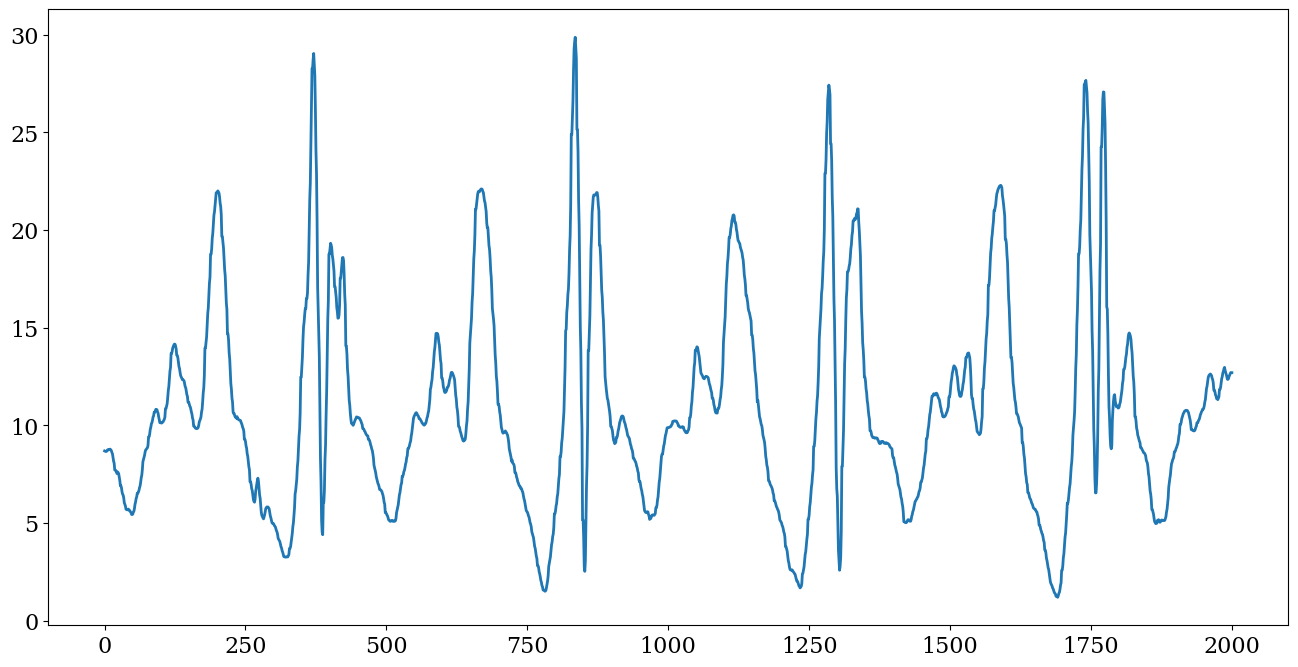

In [5]:
# исследуемый временной ряд - корень из суммы квадратов показаний акселерометра по осям
data['ts'] = data[['X_value', 'Y_value', 'Z_value']].pow(2).sum(axis = 1).pow(0.5)
data.loc[:2000,'ts'].plot()

In [6]:
X = HankelMatrix(data['ts'] , 500)
X.shape

(39502, 500)

In [7]:
from sklearn.decomposition import KernelPCA, PCA

Пример восстановленной фазовой траектории в пространстве размерности 3

временной ряд -> метод задержек -> PCA -> 3 главные компоненты, как оценка координат изначальной системы

In [8]:
pca = PCA(n_components=3)
X_PCA = pca.fit_transform(X)

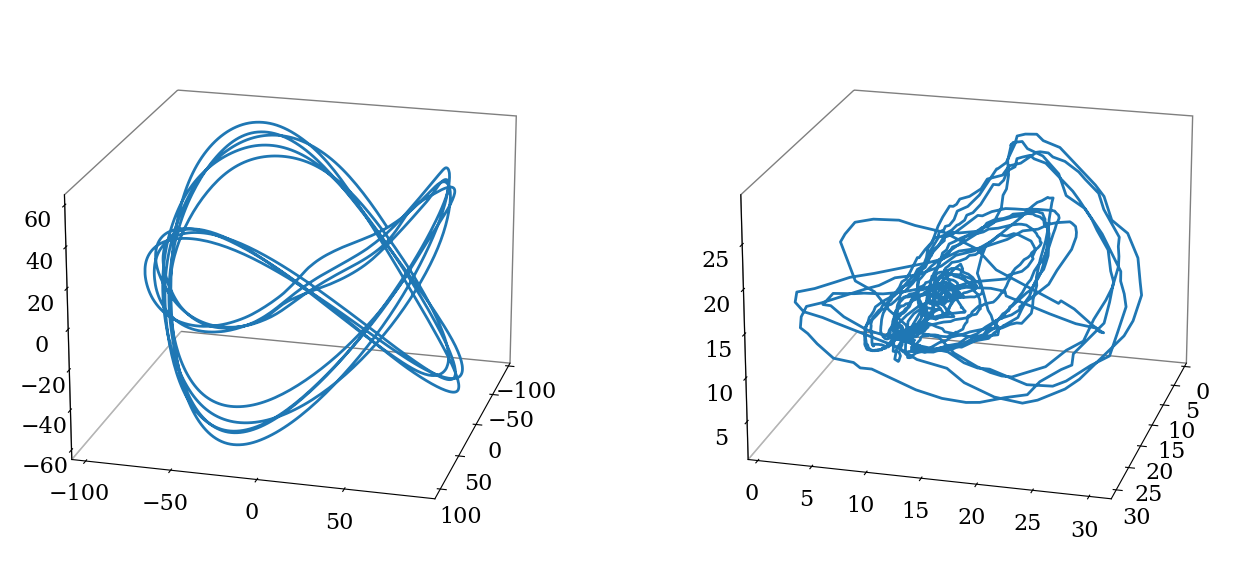

In [9]:
pca = PCA(n_components=3)
X_PCA = pca.fit_transform(X)

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1,2,1, projection='3d')
# метод  PCA
ax.plot(
    X_PCA[:2000,0],
    X_PCA[:2000,1],
    X_PCA[:2000,2]
)

ax.view_init(elev=20, azim=15)

ax.grid(False)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax2 = fig.add_subplot(1,2,2, projection='3d')
# 3 случайные точки из предыстории
ax2.plot(
    X[:2000,0],
    X[:2000,20],
    X[:2000,30]
)

ax2.view_init(elev=20, azim=15)

ax2.grid(False)
ax2.xaxis.pane.set_edgecolor('black')
ax2.yaxis.pane.set_edgecolor('black')
ax2.xaxis.pane.fill = False
ax2.yaxis.pane.fill = False
ax2.zaxis.pane.fill = False


plt.show()

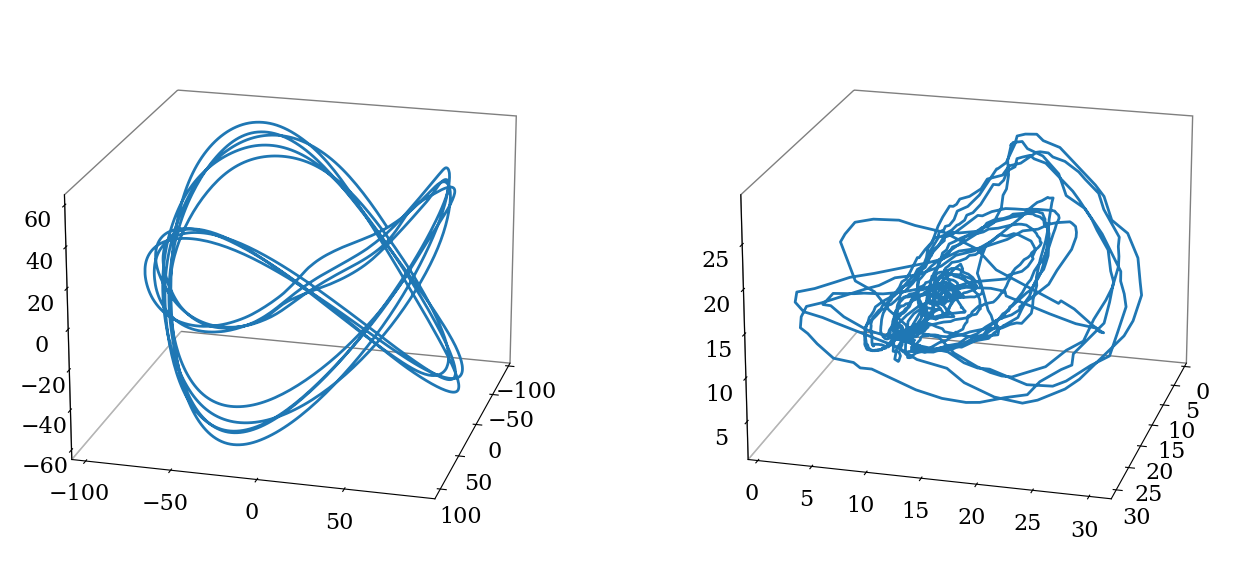

In [10]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1,2,1, projection='3d')
# метод  PCA
ax.plot(
    X_PCA[:2000,0],
    X_PCA[:2000,1],
    X_PCA[:2000,2]
)

ax.view_init(elev=20, azim=15)

ax.grid(False)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax2 = fig.add_subplot(1,2,2, projection='3d')
# 3 случайные точки из предыстории
ax2.plot(
    X[:2000,0],
    X[:2000,20],
    X[:2000,30]
)

ax2.view_init(elev=20, azim=15)

ax2.grid(False)
ax2.xaxis.pane.set_edgecolor('black')
ax2.yaxis.pane.set_edgecolor('black')
ax2.xaxis.pane.fill = False
ax2.yaxis.pane.fill = False
ax2.zaxis.pane.fill = False


plt.show()

# Задание

Набор данных включает в себя данные временных рядов, генерируемые датчиками акселерометра и гироскопа.
https://github.com/mmalekzadeh/motion-sense/tree/master

1. Выбрать один из датасетов ходьбы ```wlk_*``` или бега ```jog_*``` для одного человека ```sub_*```
2. Проанализировать связь между показателями акселерометра и гироскопа
    - Графики автокорреляций
    - Тест Грэнджера на причинность ([пример](https://phdinds-aim.github.io/time_series_handbook/04_GrangerCausality/04_GrangerCausality.html))
    - CCM ([пример](https://phdinds-aim.github.io/time_series_handbook/06_ConvergentCrossMappingandSugiharaCausality/ccm_sugihara.html))
    - Доп. ворос: в классическом алгоритме CCM при поиске ближаших соседей для точки, в множество соседей могут попадать значения из будущего. Почему это может повлиять на результат? Предложите модификацуцию метода для устранения этой проблемы. (Текстом, в виде гипотезы)
3. Посторить фазовую траекторию (пример выше), проанализировать формы полученных множеств    
    - По 3 случайным точкам из предыстории
    - Методом PCA
    - Другим методом снижения размерности (например, t-sne, kernel PCA, UMAP и тд)
    - Доп вопрос: похожи ли  фазовые траектории при условии, что CCM делается вывод о связи временных рядов? Меняется ли вывод, если поменять местами временные ряды в методе ССM?
4. Разложить временной ряд на компоненты
    - Методом ```from statsmodels.tsa.seasonal import seasonal_decompose```
    - Методом ```from scipy.fftpack import fft```
    - Методом SSA ([пример](https://www.kaggle.com/code/jdarcy/introducing-ssa-for-time-series-decomposition/notebook))
    - Обучить и проанализировать результаты двух ARIMA моделей на начальном и обработанном с помощью SSA (только для акселерометра)

In [11]:
# предварительно загруженный датасет
path_to_data = "./A_DeviceMotion_data/"

In [12]:
data = pd.read_csv(path_to_data+'wlk_15/sub_1.csv')
data = data[[
    'rotationRate.x',
    'rotationRate.y',
    'rotationRate.z',
    'userAcceleration.x',
    'userAcceleration.y',
    'userAcceleration.z'
]]

In [13]:
# подготовка временных рядов
data['rot'] = data[['rotationRate.x', 'rotationRate.y', 'rotationRate.z']].pow(2).sum(axis = 1).pow(0.5)
data['acc'] = data[['userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z']].pow(2).sum(axis = 1).pow(0.5)

<Axes: >

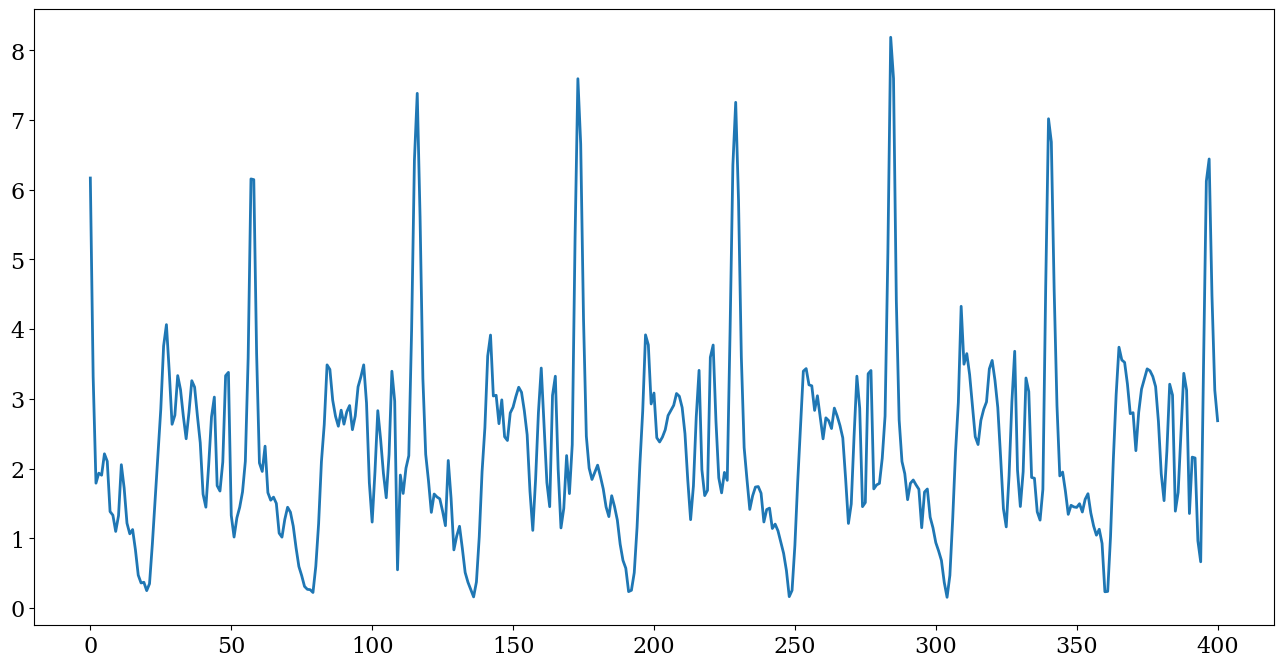

In [14]:
data.loc[:400,'rot'].plot()

<Axes: >

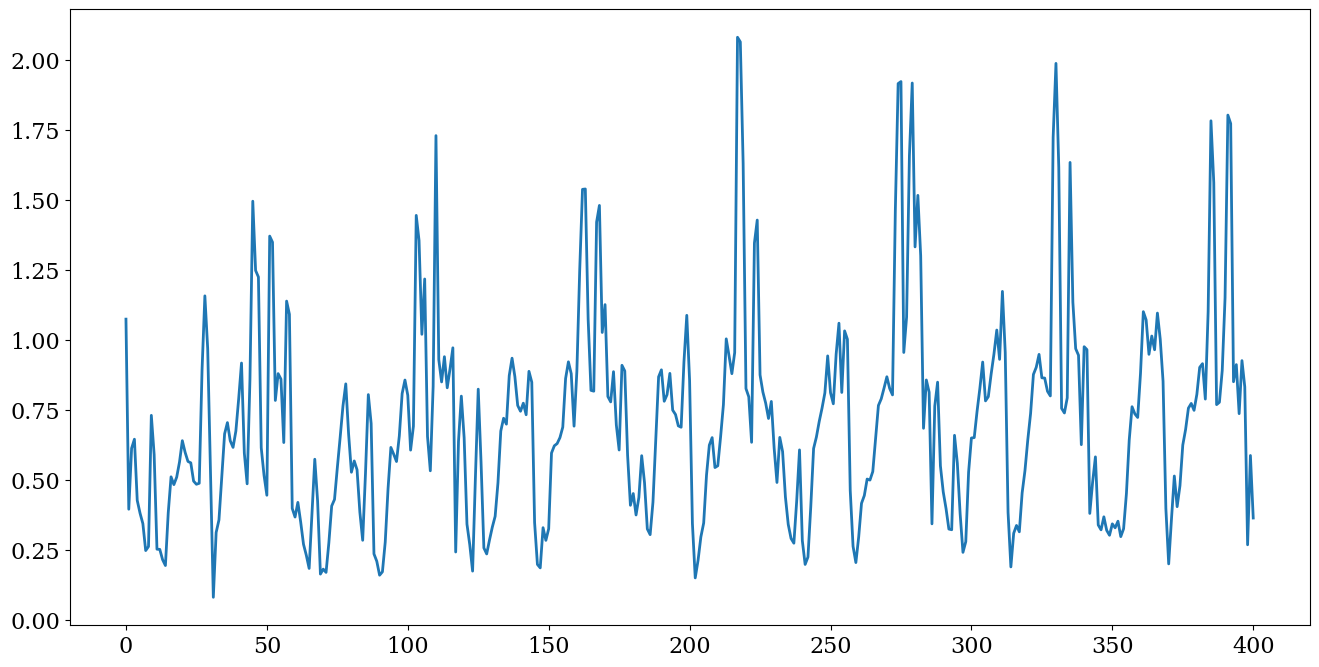

In [15]:
data.loc[:400,'acc'].plot()